# Important Discrete RVs

There are several types of discrete random variables that commonly arise in statistics and engineering applications. We review the most common ones below. We also show how to use the `scipy.stats` module to generate these random variables and work with the various functions that characterize the probability of these random variables. SciPy provides implementations of more than 80 common types of random variables, including 19 types of discrete random variables (as of SciPy 1.7.3). To prepare for our use of `scipy.stats` we will import it as `stats`:

In [1]:
import scipy.stats as stats

We will also use NumPy to create various input ranges and Matplotlib to visualize various functions:

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Discrete Uniform Random Variable

In much of our previous work on probability we have considered fair experiments, where the experiment has a finite set of outcomes, all of which are equally likely.  Here we extend this idea to a random variable:


````{panels}
:column: col-lg-12

DEFINITION
^^^
```{glossary}
discrete uniform random variable
    A random variable that has a finite number of values in its range 
    and for which all of its values have the same probability.
```
````


For example, if we roll a fair die and let $X$ be the number on the top face, then $X$ is a discrete uniform random variable with

$$
P_X(x) = 
\begin{cases}
1/6, & x \in \{1,2,3,4,5,6\} \\
0, & \mbox{o.w.}
\end{cases}
$$

We can create a discrete uniform random variable in `scipy.stats` using `stats.randint()`:

In [3]:
?stats.randint

Signature:       stats.randint(*args, **kwds)
Type:            randint_gen
String form:     <scipy.stats._discrete_distns.randint_gen object at 0x11080e370>
File:            /Applications/anaconda3/lib/python3.9/site-packages/scipy/stats/_discrete_distns.py
Docstring:      
A uniform discrete random variable.

As an instance of the `rv_discrete` class, `randint` object inherits from it
a collection of generic methods (see below for the full list),
and completes them with details specific for this particular distribution.

Methods
-------
rvs(low, high, loc=0, size=1, random_state=None)
    Random variates.
pmf(k, low, high, loc=0)
    Probability mass function.
logpmf(k, low, high, loc=0)
    Log of the probability mass function.
cdf(k, low, high, loc=0)
    Cumulative distribution function.
logcdf(k, low, high, loc=0)
    Log of the cumulative distribution function.
sf(k, low, high, loc=0)
    Survival function  (also defined as ``1 - cdf``, but `sf` is sometimes more accurate).
logsf

That help is long and complete, and it will be up-to-date with the latest version of `scipy.stats`. However, it is much more practical to refer to the web page [scipy.stats.randint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.randint.html). I have included an image of the most important part below:

![](figs/scipy-stats-randint.png)


We specify the values that the random variable will take on by specifying `low` and `high` values. As in most Python functions, the actual values that the random variable will take on will not include `high`; the actual highest value is `high - 1`.

Now let's see how to create and work with the discrete uniform distribution in Python.

We will use an object-oriented (OO) approach in working with distributions in `scipy.stats`; however, you will not need to have any background in OO programming to understand this. Basically, we will create an object with the desired distribution by calling the specified `scipy.stats` random variable type with the desired distribution parameters as the argument, and we will assign the output to a variable. 

So, to create a random variable that represents the value on the top face when rolling a fair 6-sided die. It is convention to use $U$ for such a random variable if that does not conflict with other random variables' names. In Python, we can create an object to model this random variable like:

In [4]:
U = stats.randint(1, 7)

Alternatively, we can pass `low` and `high` as keyword parameters if we want to be more explicit:

In [5]:
U = stats.randint(low=1, high=7)

U is an *object*, and it has *methods* to work with the discrete uniform random variable with the given parameters. **Methods are just like functions, except that they belong to an object, and their behavior is affected by the internal attributes (i.e., properties) of the object.**

For instance, when we created `U`, we set its attributes were set to generate a values from 1 to 6 (inclusive).  You can use Python's help function to see the methods of `U`:

In [6]:
help(U)

Help on rv_frozen in module scipy.stats._distn_infrastructure object:

class rv_frozen(builtins.object)
 |  rv_frozen(dist, *args, **kwds)
 |  
 |  # Frozen RV class
 |  
 |  Methods defined here:
 |  
 |  __init__(self, dist, *args, **kwds)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  cdf(self, x)
 |  
 |  entropy(self)
 |  
 |  expect(self, func=None, lb=None, ub=None, conditional=False, **kwds)
 |  
 |  interval(self, alpha)
 |  
 |  isf(self, q)
 |  
 |  logcdf(self, x)
 |  
 |  logpdf(self, x)
 |  
 |  logpmf(self, k)
 |  
 |  logsf(self, x)
 |  
 |  mean(self)
 |  
 |  median(self)
 |  
 |  moment(self, n)
 |  
 |  pdf(self, x)
 |  
 |  pmf(self, k)
 |  
 |  ppf(self, q)
 |  
 |  rvs(self, size=None, random_state=None)
 |  
 |  sf(self, x)
 |  
 |  stats(self, moments='mv')
 |  
 |  std(self)
 |  
 |  support(self)
 |  
 |  var(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here

A few of these should look familiar: pmf, cdf, and sf refer to the same functions that we abbreviated in {doc}`discrete-rvs` and {doc}`cdfs`: the probability mass function, cumulative distribution function, and survival function, respectively. Each of the methods can be called by adding it to the object name after a period, followed by parentheses. Any parameters or values for the method should be given in the parentheses. 

We can get the interval containing the range of a random variable in `scipy.stats` using the support method:

In [7]:
U.support()

(1, 6)

```{warning}

Note that `support` returns the lowest value in the range and the highest value in the range, so be careful in using this method. If these values were used as arguments to create a new `stats.randint` object, that object would have a different range!  
```

We can evaluate the PMF at any value:

In [8]:
U.pmf(3)

0.16666666666666666

Note that these methods can also take lists or vectors as their arguments:

In [9]:
uvals = np.arange(1, 7)
U.pmf(uvals)

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

Let's plot the PMF for this random variable:

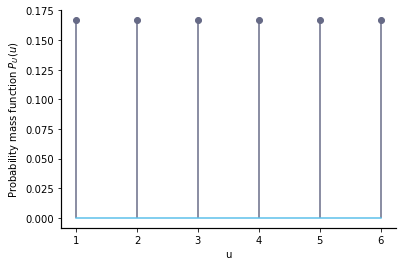

In [10]:
plt.stem(uvals, U.pmf(uvals), use_line_collection=True)
plt.xlabel("u")
plt.ylabel("Probability mass function $P_U(u)$");

We can use the `rvs` method to draw random values from this random variable. The argument is the number of random values to generate:

In [11]:
num_sims = 10_000
u = U.rvs(num_sims)
print(u[:20])

[4 2 4 5 2 3 2 3 3 3 4 2 5 3 5 2 3 6 6 5]


Let's use `plt.hist` to see if the relative frequencies are approximately equal:

(array([1687.,    0., 1713.,    0., 1685.,    0., 1634.,    0., 1607.,
        1674.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

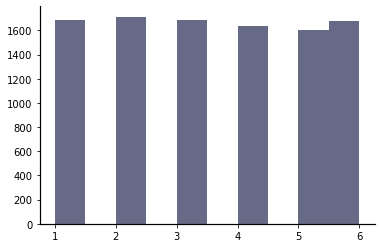

In [12]:
plt.hist(u)

The look to have equal counts but have a strange spacing. That is because `plt.hist()` by default has 10 bins, whereas the data only takes on 6 values. We will get much better results if we specify the bins. For discrete random variables with a contiguous set of integer values, specifying the number of bins may work out:

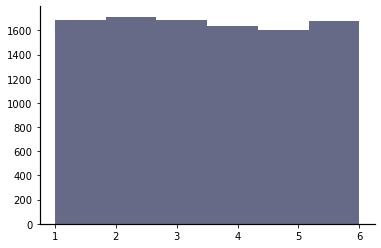

In [13]:
counts, mybins, patches = plt.hist(u, bins=6)

However, look at the set of bin edges returned: 

In [14]:
print(mybins)

[1.         1.83333333 2.66666667 3.5        4.33333333 5.16666667
 6.        ]


In general, it is safest to specify the exact bin edges to use. But again, we must be careful in dealing with the upper value, and this time doubly so. When providing a list of bin edges, they `plt.hist` interprets them as follows:

       **bins** : *array* 
            The edges of the bins. Length nbins + 1 (nbins left edges and right edge of last bin). 
            
For the last bin, we need to provide the value 6 as the left edge, and we need to provide another higher value (say, 7) as the right edge. Since a `range` or `np.arange` does not include its last value, we will need to specify a value 1 higher than 7:

In [15]:
newbins = range(1, 8)
list(newbins)

[1, 2, 3, 4, 5, 6, 7]

(array([1687., 1713., 1685., 1634., 1607., 1674.]),
 array([1, 2, 3, 4, 5, 6, 7]),
 <BarContainer object of 6 artists>)

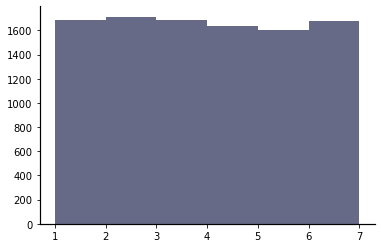

In [16]:
plt.hist(u, bins=newbins)

When working with discrete random variables, we can get the relative frequencies from `plt.hist()` by passing the `density=True` keyword argument, **provided the random variable is defined on the integers and bins of length 1 are used**.

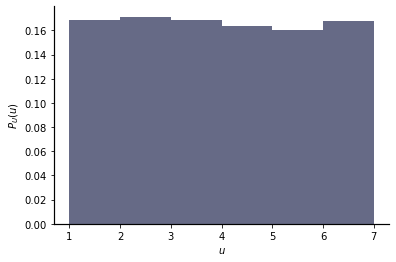

In [17]:
plt.hist(u, bins=newbins, density=True)
plt.xlabel("$u$")
plt.ylabel("$P_U(u)$");

As expected, the relative frequencies match the PMF values closely.

Next, we plot the CDF. Since the CDF takes on nonzero values in between the values the random variable takes on, we will plot it for a finer mesh of $u$ values:

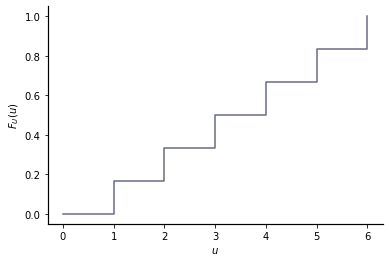

In [68]:
uvals2 = np.linspace(0, 6, 61)
plt.step(uvals2, U.cdf(uvals2), where="post")

plt.xlabel("$u$")
plt.ylabel("$F_U(u)$");

Finally, let's compare the cumulative histogram (with both `cumulative = True` and `density = True`) to the CDF:

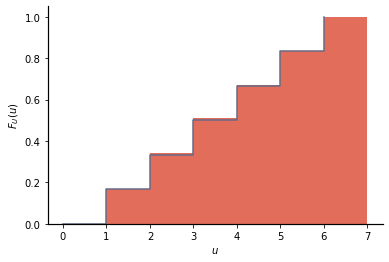

In [19]:
uvals2 = np.linspace(0, 6, 61)
plt.step(uvals2, U.cdf(uvals2), where="post")
plt.hist(u, cumulative=True, density=True, bins=newbins)

plt.xlabel("$u$")
plt.ylabel("$F_U(u)$");

**Exercise:** What happens if we plot the cumulative histogram without specifying the bins? Why do you think that happens?

## Bernoulli Random Variable

The Bernoulli random variable is another of the simplest of the discrete random variables, and it is the simplest random variable that can take on unequal probabilities. We give an 
informal definition:



````{panels}
:column: col-lg-12

DEFINITION
^^^
```{glossary}
Bernoulli random variable
    A Bernoulli random variable $B$ takes on value of 0 or 1. It is specified by a parameter $p$ such that $P(B=1) = p$ and $P(B=0) = 1-p$.
```
````


Formally, we can define the Bernoulli random variable as follows:

Let $(S, \mathcal{F}, P)$ be a probability space. Let $A \in \mathcal{F}$ be an event and define $p=P(A)$; for instance, $A$ may be an event corresponding to a "success".  Then define the Bernoulli random variable $B$ by

$$
B = 
\begin{cases}1, & s\in A \\
0, & s\notin A 
\end{cases}
$$

The PMF for a Bernoulli RV $B$ is

$$
p_B(b) = 
\begin{cases}
p, & b=1\\
1-p, & b=0\\
0,& \mbox{o.w.}
\end{cases}
$$

We have already given examples of two binary random variables in Examples 1 and 2 in {doc}`discrete-rvs`. There are many other phenomena that may be modeled as Bernoulli random variables. Some engineering examples include:
* whether a bit is 0 or 1
* whether a bit is in error in a communication system
* whether a component of a system has failed
* whether a sensor detects some phenomena.


`````{note} **DISTRIBUTIONS OF RANDOM VARIABLES**

We introduce a definition and some notation to facilitate discussing random variables of common types. 


````{panels}
:column: col-lg-12

DEFINITION
^^^
```{glossary}
distribution (of a random variable)
  The *distribution* of a random variable is a characterization of how the random variable maps sets of values to probabilities. For instance, the distribution may refer to a particular type of random variable along with whatever parameter(s) are required to completely specify the probabilities for that type of random variable. 
```
````

When the distribution refers to a particular type of random variable, we write either that a random variable has that distribution or that the random variable is *distributed* according to that type. For example, if $X$ is a Bernoulli random variable with  $p=P(X=1)$, then we say that $X$ has a Bernoulli($p$) distribution or that $X$ is distributed Bernoulli($p$). Both of these statements have the same meaning, and we will denote this in shorthand notation as 

$$
X \sim \mathbf{Bernoulli} \(p\).
$$
`````



We now show how to work with the Bernoulli random variable using `scipy.stats`. First, review the help page for `stats.bernoulli`:

In [20]:
?stats.bernoulli

Signature:       stats.bernoulli(*args, **kwds)
Type:            bernoulli_gen
String form:     <scipy.stats._discrete_distns.bernoulli_gen object at 0x110803580>
File:            /Applications/anaconda3/lib/python3.9/site-packages/scipy/stats/_discrete_distns.py
Docstring:      
A Bernoulli discrete random variable.

As an instance of the `rv_discrete` class, `bernoulli` object inherits from it
a collection of generic methods (see below for the full list),
and completes them with details specific for this particular distribution.

Methods
-------
rvs(p, loc=0, size=1, random_state=None)
    Random variates.
pmf(k, p, loc=0)
    Probability mass function.
logpmf(k, p, loc=0)
    Log of the probability mass function.
cdf(k, p, loc=0)
    Cumulative distribution function.
logcdf(k, p, loc=0)
    Log of the cumulative distribution function.
sf(k, p, loc=0)
    Survival function  (also defined as ``1 - cdf``, but `sf` is sometimes more accurate).
logsf(k, p, loc=0)
    Log of the survival 


For instance, to create a Bernoulli random variable $B_1$ with probability $P(B_1 = 1) = 0.2$, we will use the following Python code:

In [21]:
B1 = stats.bernoulli(0.2)

`B1` is now an object that represents a Bernoulli random variable with parameter $p=0.2$.

In [22]:
help(B1)

Help on rv_frozen in module scipy.stats._distn_infrastructure object:

class rv_frozen(builtins.object)
 |  rv_frozen(dist, *args, **kwds)
 |  
 |  # Frozen RV class
 |  
 |  Methods defined here:
 |  
 |  __init__(self, dist, *args, **kwds)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  cdf(self, x)
 |  
 |  entropy(self)
 |  
 |  expect(self, func=None, lb=None, ub=None, conditional=False, **kwds)
 |  
 |  interval(self, alpha)
 |  
 |  isf(self, q)
 |  
 |  logcdf(self, x)
 |  
 |  logpdf(self, x)
 |  
 |  logpmf(self, k)
 |  
 |  logsf(self, x)
 |  
 |  mean(self)
 |  
 |  median(self)
 |  
 |  moment(self, n)
 |  
 |  pdf(self, x)
 |  
 |  pmf(self, k)
 |  
 |  ppf(self, q)
 |  
 |  rvs(self, size=None, random_state=None)
 |  
 |  sf(self, x)
 |  
 |  stats(self, moments='mv')
 |  
 |  std(self)
 |  
 |  support(self)
 |  
 |  var(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here

Let's inspect and then plot the PMF values:

In [23]:
b = np.arange(-1, 3)
B1.pmf(b)

array([0. , 0.8, 0.2, 0. ])

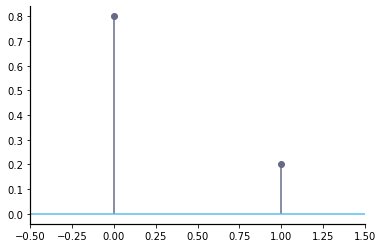

In [24]:
plt.stem(b, B1.pmf(b), use_line_collection=True)
plt.xlim(-0.5, 1.5);

The CDF also works as expected:

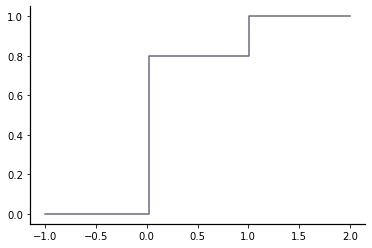

In [25]:
x = np.linspace(-1, 2, 101)
plt.step(x, B1.cdf(x), where="post");

Each `scipy.stats` random variables also has the ability to draw random values from the specified distribution (i.e., to get values of the random variable).  The method to do this is called `rvs`. If it is called with no argument, then it generates a single value of that random variable:

In [26]:
B1.rvs()

1

More commonly, we pass the number of random values we want to generate as an argument:

In [27]:
B1.rvs(10)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

Lets simulate 100_000 values of the Bernoulli(0.2) random variable and plot a histogram of the values. We will also capture the output counts to compare the relative frequencies with the true values:

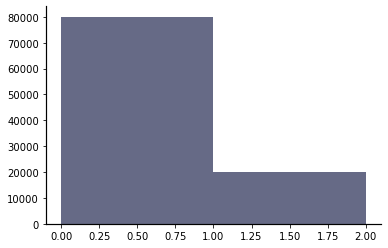

In [28]:
num_sims = 100_000
b = B1.rvs(num_sims)
mybins = [0, 1, 2]
counts, mybins, patches = plt.hist(b, bins=mybins)

Then the relative frequencies are:

The relative freqs are [0.80069 0.19931]


<StemContainer object of 3 artists>

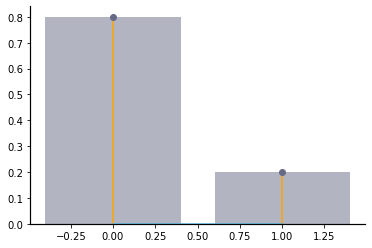

In [29]:
print(f"The relative freqs are {counts/num_sims}")
plt.bar([0, 1], counts / num_sims, alpha=0.5)

plt.stem([0, 1], B1.pmf([0, 1]), linefmt="orange", use_line_collection=True)

## Binomial Random Variable

One of the next most common types of discrete random variables arises when we have $N$ repeated, independent Bernoulli trials with identical probability of success $p$. Let $B_2$ be the number of successes. Then $B_2$ is a Binomial$(N,p)$ random variable. For example, in our very first experiments in {doc}`../02-first-stats/motivating-problem`, we considered the probability of seeing 6 or fewer heads when a fair coin is tossed 20 times. We can model the number of heads as Binomial(20, 0.5) random variable.  

Note that we can also think of a Binomial$(n,p)$ random variable as the **sum** of $n$ independent Bernoulli$(p)$ random variables. 

In shorthand notation, we will write
    
$$B_2 \sim \text{Binomial}(n,p)$$

The PMF for a Binomial random variable is easily derived:
* For $N$ trials with probability of success $p$, the probability of a particular ordering of $k$ successes is $p^k(1-p)^{N-k}$. 
* The number of different orderings of $k$ successes and $N-k$ failures in $N$ total trials is 

$$
\binom{N}{k}.
$$

Thus the probability of getting $k$ successes on $N$ independent Bernoulli($p$) trials is

$$
\binom{N}{k} p^k(1-p)^{N-k}. 
$$

Here, the variable $k$ was used instead of $b$ because $k$ is used widely in practice to represent a number of successes for a Binomial random variable.

We summarize our definition of the Binomial random variable below:
````{panels} 
:column: col-lg-12
 
DEFINITION
^^^
```{glossary}
Binomial random variable
    A binomial random variable $B_2$ represents the number of successes on $N$ independent Bernoulli trials, each of which has probability of success $p$. The probability mass function for the Binomial random variable is 
    \begin{equation} 
    p_{B_2}(k) =  
    \begin{cases} 
    \binom{N}{k} p^k (1-p)^{N-k}, & k=0,1,\dots,N \\
    0, & \mbox{o.w.} 
    \end{cases}  
    \end{equation}
```
````

Some engineering examples include:
* the number of bits in error in a packet
* the number of defective items in a manufacturing run

A binomial random variable can be created in `scipy.stats` using `stats.binom`. The number of trials and probability of success must be passed as the arguments:

In [30]:
B2 = stats.binom(10, 0.2)

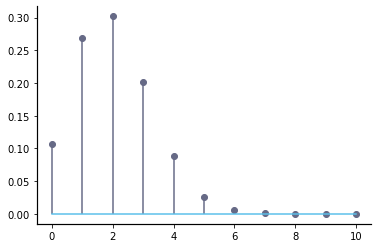

In [31]:
k = range(0, 11)
plt.stem(k, B2.pmf(k), use_line_collection=True);

Intuitively, if $p$ is small (such as $p=0.2$ in the example above), then most of the probability  mass will be around the small values of the random variable. Moreover, most people have the sense that if we conduct $N$ trials with probability $p$, then the most likely outcomes will be around $Np$. We see that this is true for our example of $N=10$ and $p=0.2$ -- the value with the highest probability is $Np=2$. If we increase $p$ to 0.6, we get the following pmf:

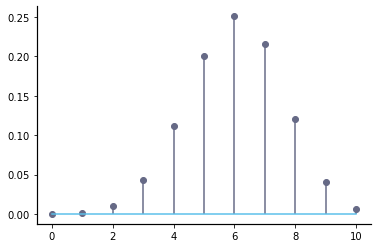

In [32]:
B3 = stats.binom(10, 0.6)
plt.stem(k, B3.pmf(k), use_line_collection=True);

Again, $Np=6$ is the most common value. Let's try $p=0.75$, for which $NP=7.5$ is not a possible value of the random variable:

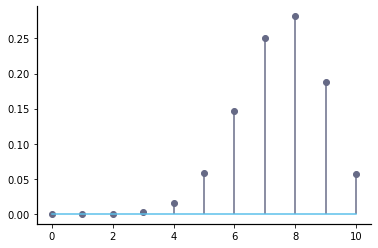

In [33]:
B4 = stats.binom(10, 0.75)
plt.stem(k, B4.pmf(k), use_line_collection=True);

For the Binomial(10, 0.75) random variable, the value with the highest probability is 8, which is close to $Np=7.5$.

Here is a plot of the CDF for the Binomial(10, 0.75) random variable:

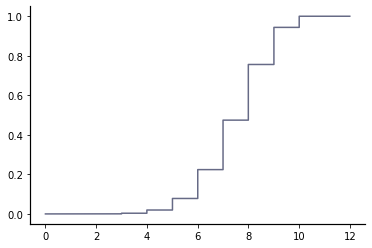

In [34]:
k = np.linspace(0, 12, 1000)
plt.step(k, B4.cdf(k), where="post");

Note that the region where the CDF is increasing quickly is the region where most of the probability is concentrated (since the size of the jumps is equal to the probabilities at the location of the jumps). Finally, we compare a cumulative histogram (with `density=True`) to the CDF:

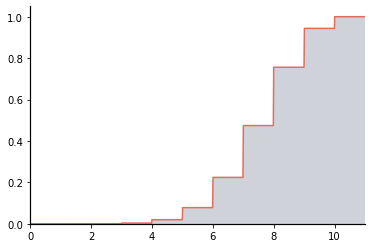

In [35]:
b4 = B4.rvs(100_000)
mybins = range(0, 12)
plt.hist(b4, bins=mybins, cumulative=True, density=True, alpha=0.3)
plt.plot(k, B4.cdf(k))
plt.xlim(0, 11);

Before we leave the binomial random variable, let's observe one more behavior. Consider how the PMF looks for a large number of trials:

/Applications/anaconda3/lib/python3.9/site-packages/scipy/stats/_discrete_distns.py:67: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


<StemContainer object of 3 artists>

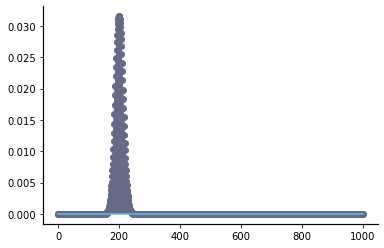

In [36]:
B5 = stats.binom(1000, 0.2)
b5vals = np.arange(0, 1001)
plt.stem(b5vals, B5.pmf(b5vals), use_line_collection=True)

Let's zoom in to where most of the probability is and use `plt.scatter` to remove the "stems":

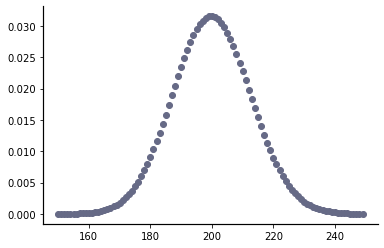

In [37]:
plt.scatter(b5vals[150:250], B5.pmf(b5vals[150:250]))

This shape is called a *bell shape* or *bell curve*. It plays an important role in probability and statistics, but we do not yet have the tools to explore it in detail yet.

##  Geometric Random Variable


````{panels}
:column: col-lg-12

DEFINITION
^^^
```{glossary}
Geometric random variable
 If independent Bernoulli trials with probability of success $p$ are conducted until the first success, the number of trials required is a *geometric random variable.*  If $G$ is a geometric random variable created from Bernoulli trials with probability of success $p$, we write $X \sim \text{Geometric}(p)$, and the probability mass function for $G$ is
    
$$
p_G(k) =
\begin{cases}
p(1-p)^{k-1}, & k=1,2,\dots \\ 
0, & \text{o.w.}\\
\end{cases}
$$
```
````

We already encountered such a scenario in Example 5 of {doc}`discrete-rvs`, where we flipped a fair coin until the first Heads. The Geometric random variable generalizes that example to handle Bernoulli trials with arbitrary probabilities. Unlike the Binomial, the Geometric random variable 
 does not have a finite range; that is, we cannot specify any particular maximum number of Bernoulli trials that might be required to get the first success. However, since the range is the counting numbers $1,2,3, \ldots$, it is countable.  

It may seem that if the range of a random variable is an infinite set, then it will not be possible to assign a non-zero probability to every outcome. However, the Geometric random variable shows that this is not true. It is possible to assign non-zero probabilities to a discrete random variable with a countable number of outcomes, provided that the probabilities go to zero fast enough. 

Note that 

\begin{align*}
\sum_{k=1}^{\infty} p (1-p)^{k-1} &= p \sum_{m=0}^{\infty} (1-p)^m \\
&= p \left( \frac 1 p \right) =1,
\end{align*}
so the total probability assigned to all the outcomes sums to 1.

Some examples include:
* The number of transmissions required for a packet to be successfully received when transmitted over a noisy channel and retransmitted whenever the received version is corrupted by noise.
* An book publisher is promoting a book on the foundations of data science at a conference. The attendees use  Python, R, or SPSS for computational data analysis.  The number of people that the publisher must talk to before finding one that uses Python for data analysis is a geometric random variable.


A geometric random variable can be created in `scipy.stats` as `stats.geom()`, where the argument is the probability of success for the Bernoulli trials. See the help for a list of methods, which are similar to those available for the other discrete random variables that we have introduced:

In [38]:
?stats.geom

Signature:       stats.geom(*args, **kwds)
Type:            geom_gen
String form:     <scipy.stats._discrete_distns.geom_gen object at 0x110803d00>
File:            /Applications/anaconda3/lib/python3.9/site-packages/scipy/stats/_discrete_distns.py
Docstring:      
A geometric discrete random variable.

As an instance of the `rv_discrete` class, `geom` object inherits from it
a collection of generic methods (see below for the full list),
and completes them with details specific for this particular distribution.

Methods
-------
rvs(p, loc=0, size=1, random_state=None)
    Random variates.
pmf(k, p, loc=0)
    Probability mass function.
logpmf(k, p, loc=0)
    Log of the probability mass function.
cdf(k, p, loc=0)
    Cumulative distribution function.
logcdf(k, p, loc=0)
    Log of the cumulative distribution function.
sf(k, p, loc=0)
    Survival function  (also defined as ``1 - cdf``, but `sf` is sometimes more accurate).
logsf(k, p, loc=0)
    Log of the survival function.
ppf(q, p, 

In [39]:
G = stats.geom(0.2)

In [40]:
g = G.rvs(100000)

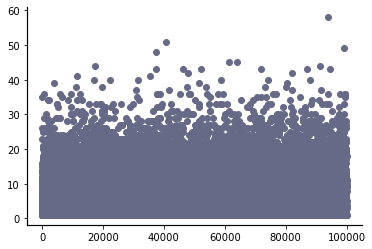

In [41]:
plt.scatter(range(len(g)), g);

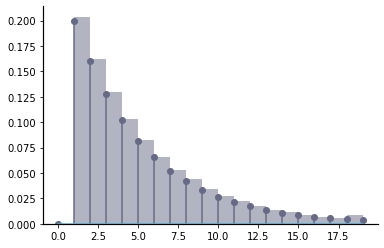

In [42]:
vals = range(20)
plt.hist(g, bins=vals, density=True, alpha=0.5)
plt.stem(vals, G.pmf(vals), use_line_collection=True);

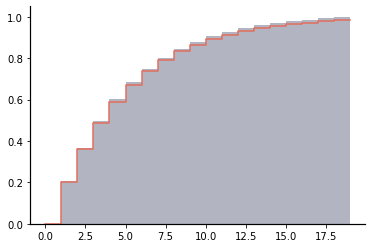

In [43]:
g = G.rvs(100000)
vals = range(20)
plt.hist(g, bins=vals, density=True, alpha=0.5, cumulative=True)
plt.step(vals, G.cdf(vals), where="post");

Rather than derive the cdf for a geometric random variable mathematically, we will determine it from a simple argument that is easy to remember. Consider instead the probability $P(G>k)$, which is the value of the survival function for $G$ with argument $k$. If $G>g$, more than $g$ trials are required **because there have been no successes in the first $g$ trials**. Thus, we can calculate $P(G>g)$ as

\begin{align*}
P(G >g) &= \operatorname{Pr} \left( \mbox{no successes on } g \mbox{ consecutive independent Bernoulli}(p) \mbox{ trials} \right) \\
&= (1-p)^g.
\end{align*}

Then the CDF for $G$ is 

$$
P(G \le k) = 1 - P(G>k) = 1 - (1-p)^g.
$$


Text(0, 0.5, 'CDF of geometric RV, $G(k)$')

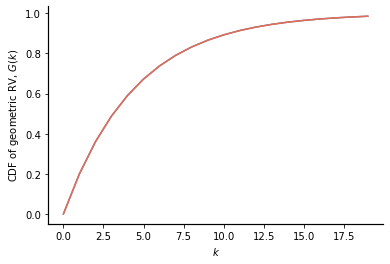

In [44]:
plt.plot(vals, G.cdf(vals))
plt.plot(vals, 1 - np.power((1 - 0.2), vals))
plt.xlabel("$k$")
plt.ylabel("CDF of geometric RV, $G(k)$")

## Poisson Random Variable

First things first -- Poisson is French and roughly pronounced "pwah - sahn". It is named after the French mathematician Siméon Denis Poisson ([Wikipedia article on Siméon Denis Poisson](https://en.wikipedia.org/wiki/Siméon_Denis_Poisson)).





Before explaining the Poisson random variable, we begin with a story told by the famous Swiss psychiatrist Carl Jung in "Synchronicity: An Acausal Connecting Principle" about observations he made starting at lunch on April 1, 1949:

> We have fish for lunch. Somebody happens to mention the custom of making an “April fish” of someone. That same morning I made a note of an inscription which read: “Est homo totus medius piscis ab imo.” [Rough translation: It is man from the middle, fish from the bottom.] In the afternoon a former patient of mine, whom I had not seen for months, showed me some extremely impressive pictures of fish which she had painted in the meantime. In the evening I was shown a piece of embroidery with fish-like sea-monsters in it. On the morning of April 2 another patient, whom I had not seen for many years, told me a dream in which she stood on the shore of a lake and saw a large fish that swam straight towards her and landed at her feet. I was at this time engaged on a study of the fish symbol in history. 

Seeing six fish in a 24-hour period seemed unusual. However, he recognizes that this must be assumed as a  "meaningful coincidence" unless there is proof "that their incidence exceeds the limits of probability."

Now, you should be asking: what does this have to do with the Poisson random variable:

1. The Poisson random variable can help us answer questions like "**What is the probability of seeing six fish in 24 hours?**" and can be combined with other random variables to answer a question like "**What is the probably of seeing six fish in 24 hours at least sometime in a 20 year period?**"
2. *Poisson* is French for... <br><br>
    **fish**!




The Poisson random variable is used to model phenomena that occur randomly over some fixed amount of time or space. For convenience of discussion and because it is the most common application, we will only consider periods of time, but everything we discuss below applies equally well to events that occur at some random rate over space. 

A Poisson random variable is the number of occurrences given the average rate at which the phenomena occur and the length of time or area of space being considered. We will use the following notation for parameters associated with a random variable:

* $\lambda$ is the average rate of occurrences over time or space,
* $T$ is a length of time  being considered, and
* $\alpha = \lambda T$ is the *average* number of occurrences over $T$.

Note that if $\alpha$ is known, then it is not required to know $\lambda$ and $T$ separately. 

Given the parameter(s), then we can define a Poisson random variable in terms of its PMF:


````{panels}
:column: col-lg-12


DEFINITION
^^^
```{glossary}
Poisson random variable
    A random variable $X$ that models events that occur randomly over time (or space), such that if $\alpha$ events occur on average in some interval of length $T$, then the PMF of $X$ is 
    \begin{equation*} p_X(x) = \begin{cases} \frac{ \alpha^k}{k!} e^{- \alpha}, & k = 0, 1, \ldots \\ 0, & \mbox{o.w.} \end{cases} \end{equation*}
```
````







Note that the range of a Poisson random variable is from 0 to $\infty$.

The shape of the Poisson varies depending on its parameter, $\alpha$. Consider first the PMF for a Poisson random variable with $\alpha=0.5$:


<StemContainer object of 3 artists>

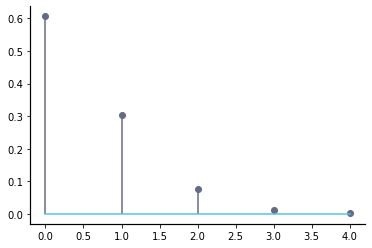

In [45]:
P1 = stats.poisson(0.5)
p1vals = range(5)
plt.stem(p1vals, P1.pmf(p1vals), use_line_collection=True)

If viewing this book online, use the slider to change the value of alpha and observe the effect on the shape of the PMF. 

In [46]:
import ipywidgets as widgets
from ipywidgets import interact

pvals = np.arange(0, 11)


def plot_poisson_pmf(alpha):
    plt.clf()
    plt.stem(pvals, stats.poisson.pmf(pvals, mu=alpha), use_line_collection=True)
    plt.show()


interact(
    plot_poisson_pmf,
    alpha=widgets.FloatSlider(
        min=0.2,
        max=5.1,
        step=0.2,
        value=1,
        description="alpha",
        style={"description_width": "initial"},
    ),
)

interactive(children=(FloatSlider(value=1.0, description='alpha', max=5.1, min=0.2, step=0.2, style=SliderStyl…

<function __main__.plot_poisson_pmf(alpha)>






Basically, we can see that there are three different cases:
* For $\alpha < 1$, the PMF is a strictly decreasing function of its argument,
* For $\alpha =1$, then the PMF is a nonincreasing function of its argument: it has the same value at 0 and 1, and then decreases for all larger values,
* For $\alpha >1$, the PMF first increases and then decreases. If $\alpha$ is an integer, then the PMF has the same value for arguments $\alpha$ and $\alpha-1$.

Illustrations of the second two cases are shown below:

Text(0, 0.5, '$p_{P3} (k)$')

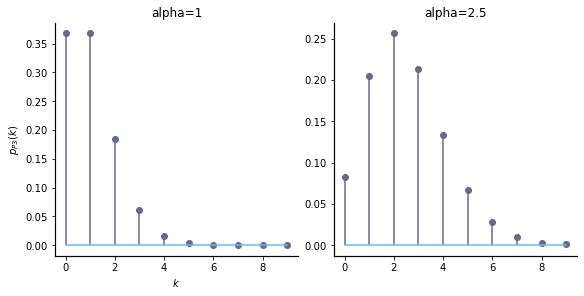

In [47]:
vals = range(10)

fig, axes = plt.subplots(1, 2, constrained_layout=True, figsize=(8, 4))


P2 = stats.poisson(1)
axes[0].stem(vals, P2.pmf(vals), use_line_collection=True)
axes[0].set_title("alpha=1")
axes[0].set_xlabel("$k$")
axes[0].set_ylabel("$p_{P2} (k)$")

P3 = stats.poisson(2.5)
axes[1].stem(vals, P3.pmf(vals), use_line_collection=True)
axes[1].set_title("alpha=2.5")
axes[0].set_xlabel("$k$")
axes[0].set_ylabel("$p_{P3} (k)$")

In [48]:
P4 = stats.poisson(100)

In [49]:
p4vals = np.arange(0, 150)

<StemContainer object of 3 artists>

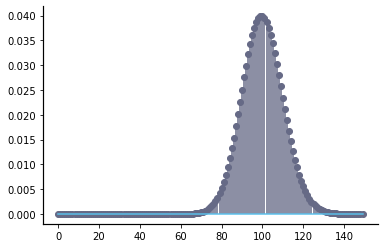

In [50]:
plt.stem(p4vals, P4.pmf(p4vals), use_line_collection=True)

Interestingly, when the average number of occurrences is large,  we get another bell shape, just as we saw with the binomial random variable.

Now, let's see how to apply the Poisson random variable to a practical problem.

**Example** 

In this example, we will show how even minimal information provided in a news article can be used to conduct a statistical test when we can apply a model for the data. In the article [Man Bitten in Florida’s ‘Shark Capital of the World’](https://www.theinertia.com/environment/man-bitten-in-floridas-shark-capital-of-the-world/), the town of New Smyrna, Florida is referred to as the “shark capital of the world.”. While mostly focusing on details of a particular shark attack in the beginning of 2022, the article provides the following information about shark bites in the same county in 2021:

    According to the International Shark Attack File (ISAF), Volusia county averages nine attacks per year but reported 17 attacks in 2021.

The much higher number of shark attacks than the average could either indicate a concerning trend or could be attributable to the randomness in the number of shark attacks that occur in a given year. How can we tell?

To try to get an answer to this, we have to first acknowledge that the article provides very little data: other than the number of shark attacks in 2021, we are only given the average number of shark attacks per year. With such limited data, we have two choices: 

1. We can introduce a model, by which we mean that we assume that the data comes from a particular distribution that can be completely specified using the available information, or
1. We can find more detailed data and use that to conduct a statistical test.

Let's start with the modeling approach. Our previous discussion of fish may make us think of the Poisson distribution, but in general we can ask several questions to determine whether the Poisson is a reasonable model:
* **Is there a specific maximum value that the data can take on? The answer should be no for the Poisson.**  For instance, there is no way to upper bound the number of shark bites that might happen in a given year. 
* **Do the individal occurrences occur randomly over time or space and can we specify some rate of occurrence for the given data? The answer should be yes. If the rate is not given, we can usually estimate it from the data.**  For the shark bite data, shark bites occur at random times. 


In this example, we will use approach 1. We assume that the number of shark attacks in Volusia County in a year is Poisson with parameter 9 representing the average number of shark attacks. 

Let's use Scipy.Stats to create a Poisson object with this paramter:

In [51]:
import scipy.stats as stats

S = stats.poisson(9)

Now we will see how to conduct statistical test using this model. We can set up the following null hypothesis significance test:
* $H_0$: the observation comes from the Poisson(9) distribution
* $H_1$: the observation comes from some other distribution

Let's choose a $p$-value threshold of $0.05$.

As before, we do not usually measure the probability of seeing the exact result observed in the data. Instead, we ask about seeing a result that is at least as extreme as this model. In this case, it makes sense to conduct a one-sided test, where we determine the probability of seeing 17 **or more** attacks in a year.

Note that $P(S \ge 17) = P(S> 16)$ allows us to calculate this probability using the survival function:

In [52]:
S.sf(16)

0.011105909377583819

This probability is smaller than 0.05, so we reject $H_0$ under this test.

However, the article might not have included this information if the result had not seemed significant in the first place. We might instead ask the probabilty of seeing such an extreme result at least once in a decade. We can model this as a binomial random variable with 10 trials, each of which has probability of "success" $P(S>16)$. Let's call this binomial random variable $S_2$, and we will create a Scipy.Stats object to represent its distribution:

In [53]:
S2 = stats.binom(10, S.sf(16))

Then the probability of having at least one year with 17 or more shark attacks in a decade is $P(S_2 >0)$, which is

In [54]:
S2.sf(0)

0.105669964152784

Thus there is more than a 10% chance that there is at least one year in a decade with 17 or more shark attacks in Volusia County. Given this, we would not be able to reject the possibility that the 2021 result comes from the Poisson(9) distribution. It may just be attributable to the random nature of the number of shark attacks in a year. 

Let's use this example to work with one more of our distributions. What is the probability that it is more than 10 years before there is another year with 15 or more shark attacks?

We can model the number of years until there is a year with 15 or more shark attacks as a Geometric random variable with probability of "success" $P(S>14)$. Let $S_3$ denote this random variable, and we can create a Scipy.Stats object to represent its distribution:

In [55]:
S3 = stats.geom(S.sf(14))

Then the probability that it is more than 10 years before there is another year with 15 more shark attacks is $P(S_3 > 10)$, which is

In [56]:
S3.sf(10)

0.6547473480899506

There is over an 65% chance that we will not have a year with 15 or more shark attacks in the next decade. 



# Arbitrary Discrete RVs

We can create a discrete random variable with an  finite set of integer values  using the `stats.rv_discrete()` method:

In [57]:
?stats.rv_discrete

Init signature:
stats.rv_discrete(
    a=0,
    b=inf,
    name=None,
    badvalue=None,
    moment_tol=1e-08,
    values=None,
    inc=1,
    longname=None,
    shapes=None,
    extradoc=None,
    seed=None,
)
Docstring:     
A generic discrete random variable class meant for subclassing.

`rv_discrete` is a base class to construct specific distribution classes
and instances for discrete random variables. It can also be used
to construct an arbitrary distribution defined by a list of support
points and corresponding probabilities.

Parameters
----------
a : float, optional
    Lower bound of the support of the distribution, default: 0
b : float, optional
    Upper bound of the support of the distribution, default: plus infinity
moment_tol : float, optional
    The tolerance for the generic calculation of moments.
values : tuple of two array_like, optional
    ``(xk, pk)`` where ``xk`` are integers and ``pk`` are the non-zero
    probabilities between 0 and 1 with ``sum(pk) = 1``. ``xk

Note that this method implicitly assumes that the discrete random variable is defined on a subset of the integers. 

Let's use this method to create a random variable based on Example 3 of {doc}`discrete-rvs`. Note that we need to pass a tuple that includes:
* a list or vector containing the random variable's range, and 
* a list or vector containing the probabilities of each point in the random variable's range.

In [58]:
range1 = [0, 1, 2]
probs1 = [1 / 4, 1 / 2, 1 / 4]

In [59]:
A = stats.rv_discrete(values=(range1, probs1))

Now we can work with the random variable `A` using the same methods that we used for pre-defined discrete random variables in `scipy.stats`.

We will use `A` to demonstrate how to work with such a random variable. If we want to plot the PMF for a random variable created in this way, we can first determine the range of `A`, using `support()` method:

In [60]:
A.support()

(0, 2)


If we want to plot the PMF for every value in the support, then we can use `np.arange()` to create a numpy vector of these values. We will capture the outputs of `support()` into  variables `low` and `high`, and we will need to pass `high+1` as the second argument to `np.arange()` because upper values are not included in the created vector:

In [61]:
low, high = A.support()
avals = np.arange(low, high + 1)
print(avals)

[0 1 2]


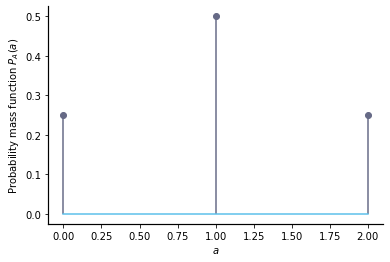

In [62]:
plt.stem(avals, A.pmf(avals), use_line_collection=True)
plt.xlabel("$a$")
plt.ylabel("Probability mass function $P_A(a)$");

Let's simulate some random values from this distribution and compute the relative frequencies:

In [63]:
num_sims = 100_000
a = A.rvs(size=num_sims)

In [64]:
avals, counts = np.unique(a, return_counts=True)

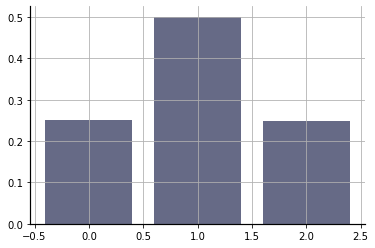

In [65]:
plt.bar(avals, counts / num_sims)
plt.grid();

As expected, the relative frequencies closely match the probabilities.

Now, let's compare the analytical CDF to the empirical CDF generated bh `plt.hist()`:

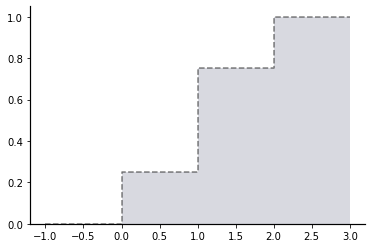

In [66]:
avals2 = np.linspace(-1, 3, 81)
plt.step(avals2, A.cdf(avals2), "k--", where="post", alpha=0.5)
plt.hist(a, cumulative=True, density=True, bins=[0, 1, 2, 3], alpha=0.25);

As expected, the theoretical result (the dashed line) matches the empirical histogram (the shaded region) almost exactly.

## Terminology Review

In [67]:
from jupytercards import display_flashcards

#display_flashcards('flashcards/'+'important-discrete-rvs.json')

github='https://raw.githubusercontent.com/jmshea/Foundations-of-Data-Science-with-Python/main/'
github+='08-random-variables/flashcards/'
display_flashcards(github+'important-discrete-rvs.json')


